손실함수(Cost Function)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.array([
    [0,1,1,2,3,np.nan],
    [np.nan,1,1,2,1,-1]
])

data

array([[ 0.,  1.,  1.,  2.,  3., nan],
       [nan,  1.,  1.,  2.,  1., -1.]])

In [3]:
np.nansum(data)

11.0

In [4]:
def cost(pred, R) :
    # 행렬 인수분해 알고리즘 손실 계산해 주는 함수 생성
    
    rating = (pred-R) ** 2
    
    return np.nansum(rating)


In [5]:
# 예측 값 행렬

pred = np.array([
    [4,4,1,1,2,2],
    [4,4,3,1,5,5],
    [2,2,1,1,3,4],
    [1,3,1,4,2,2],
    [1,2,4,1,2,5]
])

R = np.array([
    [3,4,1,np.nan,1,2],
    [4,4,3,np.nan,5,3],
    [2,3,np.nan,1,3,4],
    [1,3,2,4,2,2],
    [1,2,np.nan,1,2,5]
])

In [6]:
cost(pred, R)

8.0

경사하강법

In [8]:
# 채점을 위해서 임의성(random) 사용하는 numpy 도구들의 결과를 일정하게 나오게 해야 함

np.random.seed(32)


In [10]:
# numpy 출력 옵션 설정

np.set_printoptions(precision=2, suppress = True)

In [11]:
# 유저 취향과 상품 속성을 곱해서 예측 값을 계산하는 함수
def predict(Theta, X) :
    return Theta @ X 

In [12]:
# cost function(손실함수) : 예측값과 실제값의 차이 >> 최소화
def cost(prediction, R) :
    return np.nansum((prediction - R)**2)

In [13]:
# 임의로 유저 취향과 상품 속성 행렬 만들어 주는 함수
def initialize(R, num_features) :
    num_users, num_items = R.shape
    
    Theta = np.random.rand(num_users, num_features)
    X = np.random.rand(num_features, num_items)
    
    return Theta, X

In [15]:
def gradient_descent(R, Theta, X, iteration, alpha, lambda_) :
    # R : 실제 평점 데이터,
    # Theta : 유저 취향 행렬
    # X : 영화 속성 행렬
    # iteration : 경사하강 횟수
    # alpha : 학습률(learning rate)
    # lambda_ : 정규화 상수
    
    # 행렬 인수분해(martirx factorization) 경사하강 함수
    num_user, num_items = R.shape # 유저데이터, 영화 데이터, 속성 개수 파악
    num_features = len(X) # 영화의 속성 행렬 크기 >> num_features 속성 개수 
    costs = [] # 경사 하강을 할 때마다 손실 계산
    
    for _ in range(iteration) : # 경사하고 싶은 만큼 반복
        prediction = predict(Theta, X) # 예측값 계산
        error = prediction - R  # 원소별 예측값과 실제값의 차이(오차) 저장하는 행렬 계산
        costs.append(cost(prediction, R))   
        
        # 모든 유저, 모든 영화데이터, 모든 속성에 대해 반복해서 도는 반복문 작성
        
        for i in range(num_user) :
            for j in range(num_items) :
                if not np.isnan(R[i][j]) : # 데이터 평점 없는 값들에 대해서 건너 뛰기
                    for k in range(num_features) :
                        Theta[i][k] -= alpha * (np.nansum(error[i, :] * X[k, :]) + lambda_ * Theta[i][k])
                        X[k][j] -= alpha * (np.nansum(error[:, j] * Theta[:, k] + lambda_ * X[k][j]))
    
    return Theta, X, costs

In [43]:
# 실행 코드

# 1. 평점 데이터 가져오기
df = pd.read_csv('./cf_ratings.csv', index_col = 'user_id')

In [44]:
# 2. 평점 데이터에 평균으로 정규화
for row in df.values :
    row -= np.nanmean(row)

In [45]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
user_id,,,,,,,,,,,,,,,,,,,,
0,-0.909091,0.090909,1.090909,NaN,-0.909091,0.090909,NaN,NaN,NaN,1.090909,1.090909,NaN,NaN,-1.909091,NaN,NaN,-0.909091,2.090909,-0.909091,NaN
1,NaN,NaN,NaN,0.500000,NaN,1.500000,NaN,NaN,-1.500000,NaN,0.500000,NaN,-2.500000,NaN,NaN,NaN,NaN,1.500000,NaN,NaN
2,-1.400000,NaN,-2.400000,NaN,NaN,1.600000,1.600000,NaN,NaN,NaN,NaN,1.600000,-0.400000,-0.400000,NaN,-0.400000,-0.400000,0.600000,NaN,NaN
3,NaN,-0.444444,1.555556,NaN,NaN,NaN,0.555556,-0.444444,NaN,1.555556,-0.444444,NaN,0.555556,NaN,NaN,-1.444444,NaN,NaN,NaN,-1.444444
4,NaN,NaN,NaN,1.818182,NaN,NaN,-1.181818,-1.181818,-1.181818,NaN,-0.181818,0.818182,-1.181818,1.818182,0.818182,NaN,NaN,NaN,0.818182,-1.181818
5,NaN,0.666667,-0.333333,NaN,NaN,1.666667,NaN,NaN,NaN,-0.333333,-1.333333,NaN,NaN,NaN,-2.333333,NaN,0.666667,-0.333333,NaN,1.666667
6,0.000000,NaN,NaN,NaN,1.000000,2.000000,-1.000000,-1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,-1.000000,1.000000,NaN,NaN,NaN,-2.000000
7,NaN,2.222222,-1.777778,1.222222,NaN,NaN,NaN,0.222222,-1.777778,NaN,-1.777778,NaN,NaN,1.222222,NaN,NaN,-0.777778,NaN,NaN,1.222222
8,NaN,0.333333,-1.666667,-1.666667,NaN,0.333333,NaN,1.333333,NaN,-1.666667,-1.666667,NaN,1.333333,1.333333,-0.666667,NaN,NaN,2.333333,0.333333,NaN


In [46]:
# 행렬들 초기화
R = df.values
Theta, X = initialize(R, 5)

In [47]:
Theta

array([[0.34, 0.75, 0.86, 0.14, 0.73],
       [0.74, 0.15, 0.97, 0.86, 0.3 ],
       [0.33, 0.39, 0.29, 0.12, 0.75],
       [0.73, 0.77, 0.7 , 0.7 , 0.69],
       [0.84, 0.11, 0.91, 0.41, 0.42],
       [0.12, 0.89, 0.35, 0.84, 0.69],
       [0.59, 0.27, 0.94, 0.98, 0.7 ],
       [0.87, 0.6 , 0.43, 0.9 , 0.63],
       [0.45, 0.13, 0.85, 0.55, 0.53],
       [0.12, 0.94, 0.51, 0.56, 0.39],
       [0.04, 0.78, 0.59, 0.02, 0.78],
       [0.51, 0.94, 0.02, 0.14, 0.77],
       [0.15, 0.32, 0.47, 0.47, 0.8 ],
       [0.1 , 0.83, 0.62, 0.81, 0.44],
       [0.88, 0.7 , 0.14, 0.58, 0.67],
       [0.41, 0.1 , 0.39, 0.94, 0.18],
       [0.91, 0.23, 0.08, 0.11, 0.49],
       [0.44, 0.91, 0.37, 0.6 , 0.63],
       [0.65, 0.35, 0.29, 0.43, 0.37],
       [0.17, 0.93, 1.  , 0.84, 0.19]])

In [48]:
X

array([[0.94, 0.36, 0.93, 0.39, 0.39, 0.92, 0.89, 0.06, 0.35, 0.13, 0.65,
        0.56, 0.82, 0.56, 0.44, 0.22, 0.09, 0.73, 0.87, 0.38],
       [0.29, 0.69, 0.23, 0.33, 0.82, 0.58, 0.59, 0.25, 0.9 , 0.02, 0.03,
        0.76, 0.57, 0.14, 0.61, 0.35, 0.03, 0.26, 0.99, 0.83],
       [0.33, 0.16, 0.27, 0.19, 0.8 , 0.5 , 0.59, 0.77, 0.22, 0.56, 0.11,
        0.3 , 0.75, 0.76, 0.57, 0.83, 0.28, 0.77, 0.52, 0.38],
       [0.05, 0.09, 0.69, 0.15, 0.29, 0.99, 0.83, 0.71, 0.67, 0.35, 0.78,
        0.86, 0.2 , 0.55, 0.57, 0.54, 0.68, 0.28, 0.77, 0.47],
       [0.82, 0.1 , 0.49, 0.81, 0.07, 0.19, 0.68, 0.61, 0.44, 0.04, 0.98,
        0.49, 0.03, 0.96, 0.07, 0.82, 0.55, 0.27, 0.16, 0.86]])

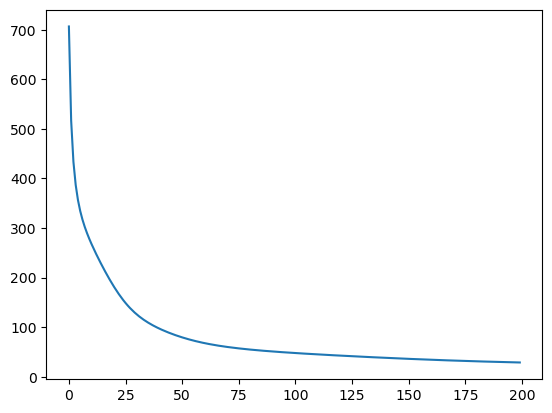

In [49]:
# 경사하강

Theta, X, costs = gradient_descent(R, Theta, X, 200, 0.001, 0.01)
plt.plot(costs)